In [343]:
# load all the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [344]:
# read csv file
df =pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


descriptive analysis

In [345]:
# get information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [346]:
# see the numerical data descreption
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [347]:
for col in df.columns:
    print(df[col].value_counts())
    print('*'*44)


Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************************************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************************************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
*****

In [348]:
# categorical data description
df.describe(include='O')

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


In [349]:
# Balcony have only 4 unique values 
df['bath'].value_counts(), df['balcony'].value_counts()

(2.0     6908
 3.0     3286
 4.0     1226
 1.0      788
 5.0      524
 6.0      273
 7.0      102
 8.0       64
 9.0       43
 10.0      13
 12.0       7
 13.0       3
 11.0       3
 16.0       2
 27.0       1
 40.0       1
 15.0       1
 14.0       1
 18.0       1
 Name: bath, dtype: int64,
 2.0    5113
 1.0    4897
 3.0    1672
 0.0    1029
 Name: balcony, dtype: int64)

<AxesSubplot:xlabel='area_type', ylabel='price'>

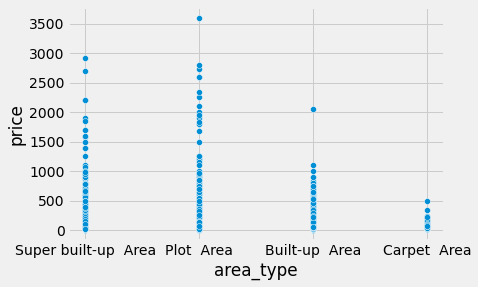

In [350]:
sns.scatterplot(y=df['price'],x=df['area_type'])

<BarContainer object of 4 artists>

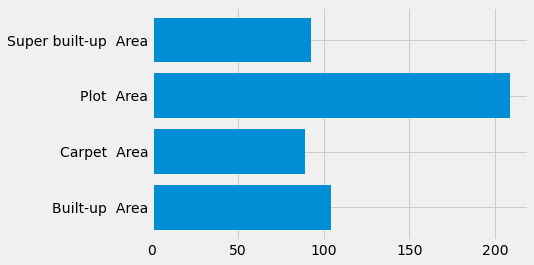

In [351]:
are = df.groupby('area_type').mean()
a= [a for a,s in df.groupby('area_type')]

plt.barh(a,are['price'])

Missinng value treatment

In [352]:
# see the area type
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64


* carpet area : net usable floor area where one can spread carpet or areas of an apartment which includes usable spaces like kitchen, toilet, bathroom & internal partition wall.
* Built up area : carpet area + External walls + balconies + service shafts
* Built up area roughly 10%-15% more than carpet area.
* super built up area:  built up area plus propotionate share of common areas such as lobies, lift shafts, club house, air ducts, pip ducts & other covered common facilities.
* Super built up area roughly 20% -40% more than carpet area
* Loading = super built up area - carpet area

In [353]:
# check the null values in the dataset
# if your variable null value exceed 25% drop it
for col in df.columns:
    print(f"\'{col}\' variable have {df[col].isnull().sum()} Missing values in {df[col].isnull().sum()*100/len(df)}% ")


'area_type' variable have 0 Missing values in 0.0% 
'availability' variable have 0 Missing values in 0.0% 
'location' variable have 1 Missing values in 0.0075075075075075074% 
'size' variable have 16 Missing values in 0.12012012012012012% 
'society' variable have 5502 Missing values in 41.306306306306304% 
'total_sqft' variable have 0 Missing values in 0.0% 
'bath' variable have 73 Missing values in 0.5480480480480481% 
'balcony' variable have 609 Missing values in 4.572072072072072% 
'price' variable have 0 Missing values in 0.0% 


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


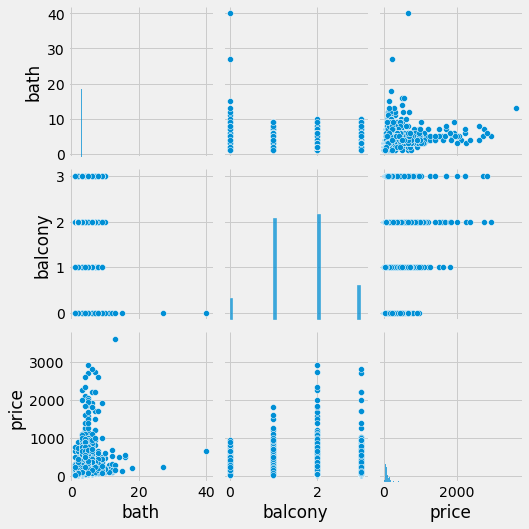

In [355]:
sns.pairplot(df)

In [356]:
df.drop(['availability','balcony','area_type','society'],axis=1,inplace=True)
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


(               bath         price
 count  13247.000000  13320.000000
 mean       2.692610    112.565627
 std        1.341458    148.971674
 min        1.000000      8.000000
 25%        2.000000     50.000000
 50%        2.000000     72.000000
 75%        3.000000    120.000000
 max       40.000000   3600.000000,
 <matplotlib.collections.PathCollection at 0x2aeaf4cf940>)

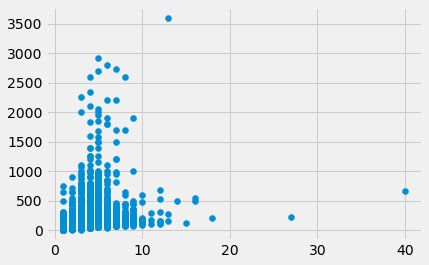

In [357]:
# plot price vs bathroom variable
df.describe(), plt.scatter(x=df['bath'],y=df['price'])

In [358]:
# fill nan values with most frequent location
df.loc[df['location'].isna(),['location']]= 'Whitefield'
df['location'].isna().any()

False

In [359]:
# fill nan values with most frequent value
df['size']= df['size'].fillna('2 BHK')
df['size'].isna().any()

False

In [360]:
# fill nan values with median
df.loc[df['bath'].isna(),['bath']] = df['bath'].median()
df['bath'].isna().any()

False

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [362]:
df['size'] = df['size'].str.split().str.get(0).astype(int)
df.dtypes 


location       object
size            int32
total_sqft     object
bath          float64
price         float64
dtype: object

Outlier treatment

<AxesSubplot:ylabel='size'>

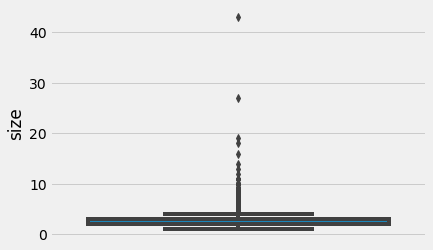

In [363]:
# these are outlires
sns.boxplot(y=df['size'])

In [364]:
df.loc[df['size']>20] = 2

In [365]:
# see the 'total_sqft' data
print(df['total_sqft'].value_counts())
print(df['total_sqft'].unique())

1200    843
1100    221
1500    205
2400    195
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2118, dtype: int64
['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


In [366]:
# convert range number into mean or float

def sqft(s):
    temp = s.split(' - ')
    if len(temp)==2:
        return ((float(temp[0])+float(temp[1]))/2)
    try:
        return float(s)
    except:
        return None


In [367]:

df['total_sqft'] = df['total_sqft'].astype('str').apply(sqft)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [368]:
# check any null values
df['total_sqft'].isna().sum()

46

In [369]:
# now fill up 46 nan values with median
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].median())
df['total_sqft'].isna().sum()

0

What is the importance of price per square foot?

price per square foot tells you how efficient you are with the use of price space, and it helps you make smarter merchandising, inventory, and sales decisions.

In [370]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,Richards Town,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [371]:
np.sum(df['price_per_sqft'].isna())

0

In [372]:
df.loc[df['location'].value_counts(),['location']]

,location
541,Whitefield
399,Chandapura
302,Kalena Agrahara
273,Sundara Nagar
234,Kalyan nagar
...,...
1,Chikka Tirupathi
1,Chikka Tirupathi
1,Chikka Tirupathi
1,Chikka Tirupathi


In [373]:
# removiing any extra space from location values
df['location'] = df['location'].astype('str').apply(lambda x: x.strip())
df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [374]:
df.loc[df['location'].value_counts(),['location']]

,location
542,Byatarayanapura
399,Chandapura
304,Kothanur
273,Sundara Nagar
237,Vijayanagar
...,...
1,Chikka Tirupathi
1,Chikka Tirupathi
1,Chikka Tirupathi
1,Chikka Tirupathi


In [375]:
# make location little simpler by reduciing number of unique values
# so values which are less than or equal to 10 make 'other'
value_c = df['location'].value_counts()
value_c

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [376]:
value_count_10 = value_c[value_c<=10]
value_count_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [377]:
# There are 2886 rows whic are <=10
df['location'] = df['location'].apply(lambda x: 'other' if x in value_count_10 else x)
df['location'].value_counts()


other                 2886
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [378]:
df.rename(columns={'size':'bhk'},inplace=True)
df.describe() 

,bhk,total_sqft,bath,price,price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,2.797823,1557.866722,2.684084,112.499110,7.932138e+03
std,1.229030,1235.241923,1.281957,148.898808,1.062529e+05
min,1.000000,1.000000,1.000000,2.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,50.000000,4.267260e+03
50%,3.000000,1276.000000,2.000000,72.000000,5.440000e+03
75%,3.000000,1677.250000,3.000000,120.000000,7.331341e+03
max,19.000000,52272.000000,18.000000,3600.000000,1.200000e+07


standard size of flat in Bengaluru
* 1bhk: 450 -600 sqft 
* 2bhk: 650-800 sqft 
* 3bhk: 900-1100 sqft 
* 4bhk: 1300-1700 sqft

In [379]:
# in 'total_sqft' min is 1 which is obviously an outlier bu to get some clearity
# let's see sqftper bhk

(df['total_sqft']/df['bhk']).describe()

count    13320.000000
mean       575.096398
std        388.163714
min          0.250000
25%        473.000000
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [380]:
# minimum feasible area per 'bhk' must be >300

df = df[((df['total_sqft']/df['bhk']))>=300]
df.describe()

,bhk,total_sqft,bath,price,price_per_sqft
count,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000
mean,2.650064,1593.601347,2.559039,111.409518,6313.436790
std,0.976813,1259.484400,1.077715,151.916676,4174.854291
min,1.000000,300.000000,1.000000,8.440000,267.829813
25%,2.000000,1117.750000,2.000000,49.000000,4209.344773
50%,3.000000,1300.000000,2.000000,70.000000,5295.544522
75%,3.000000,1700.000000,3.000000,115.000000,6927.325006
max,16.000000,52272.000000,16.000000,3600.000000,176470.588235


In [381]:
# Outlier treatment for 'price_per_sqft'

<AxesSubplot:ylabel='total_sqft'>

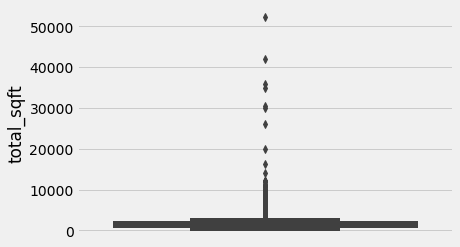

In [382]:
# lets see the price per sqft outliers
sns.boxplot(y='total_sqft',data=df)
# df.describe()

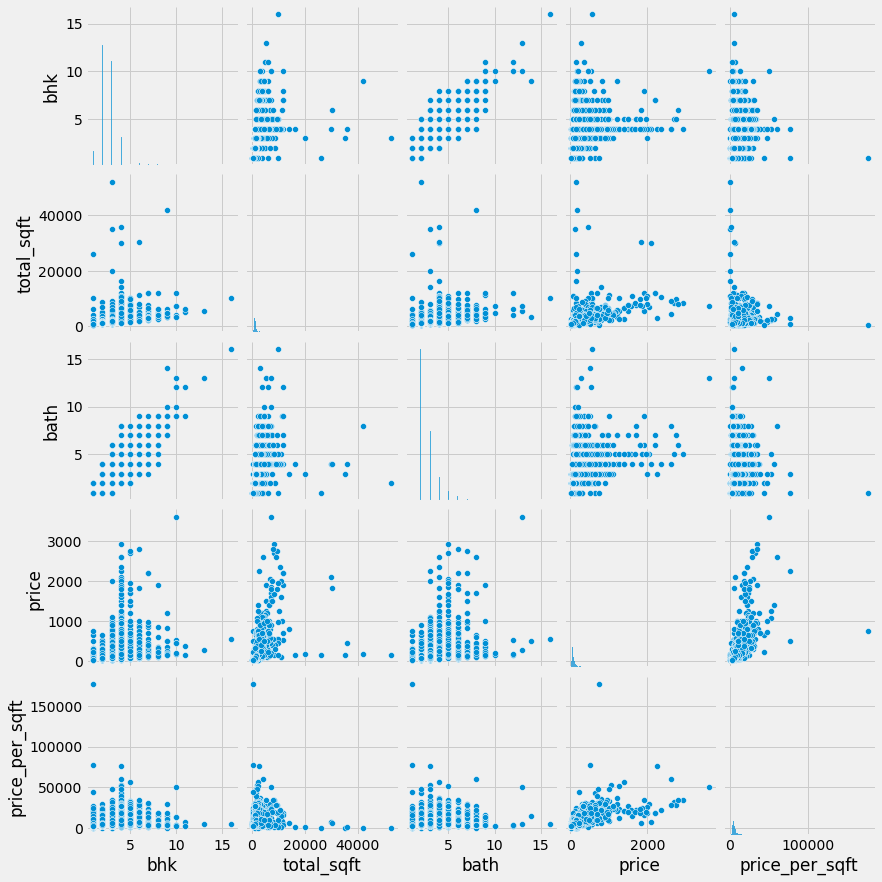

In [383]:
sns.pairplot(df)

<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

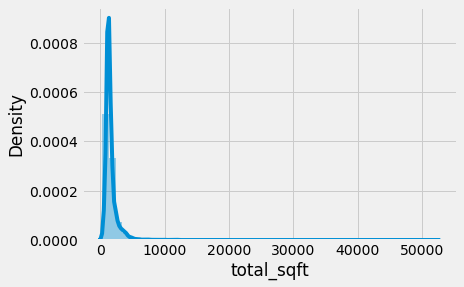

In [384]:
sns.distplot(df['total_sqft'])

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

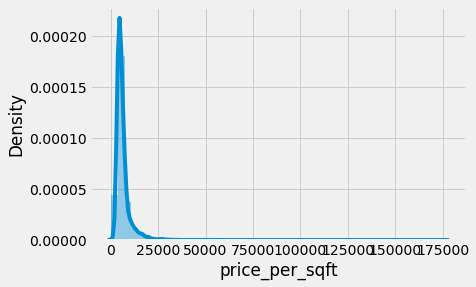

In [385]:
# df.loc[df['price_per_sqft']>5500,['total_sqft']] = 1300
# df.describe()
sns.distplot(df['price_per_sqft'])

In [386]:
def ppsqft(dframe):
    ppsqft_outlier = pd.DataFrame()

    for key,subdf in dframe.groupby('location'):
        me = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)

        gen_df = subdf[((subdf.price_per_sqft>(me-sd))& (subdf.price_per_sqft<=(me+sd)))]
        ppsqft_outlier = pd.concat([ppsqft_outlier,gen_df],ignore_index=True)
    return ppsqft_outlier

In [387]:
df = ppsqft(df)
df.describe()

,bhk,total_sqft,bath,price,price_per_sqft
count,10350.000000,10350.000000,10350.000000,10350.000000,10350.000000
mean,2.574396,1508.314464,2.471498,91.352222,5664.946514
std,0.898147,880.015608,0.979601,86.293778,2273.641840
min,1.000000,300.000000,1.000000,10.000000,1250.000000
25%,2.000000,1110.000000,2.000000,49.000000,4243.008921
50%,2.000000,1285.000000,2.000000,67.000000,5177.304965
75%,3.000000,1650.000000,3.000000,100.000000,6442.979678
max,16.000000,30400.000000,16.000000,2200.000000,24509.803922


(<AxesSubplot:xlabel='bhk', ylabel='Density'>, (10350, 6))

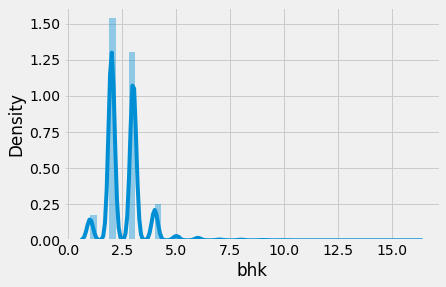

In [388]:
sns.distplot(df['bhk']), df.shape

In [389]:

def bhk_outlier(dframe):
    exclude_ind = np.array([])
    for loc,loc_df in dframe.groupby('location'):    # perform groupby 'location' on df
         bhk_stat = {}
         for  bhk, bhk_df in loc_df.groupby('bhk'):             # perform groupby 'bhk' on locatioin_dataframe values
            bhk_stat[bhk]= {'mean': np.mean(bhk_df.price_per_sqft),
                                'std' : np.std(bhk_df.price_per_sqft),
                                'count': bhk_df.shape[0]
                                }                                  # creating an stat dictionary which include mean,count of 'bhk' based on price_per_sqft
            for bhk, bhk_df in loc_df.groupby('bhk'):
                stats = bhk_stat.get(bhk-1)
                if stats and stats['count']>5:
                    exclude_ind = np.append(exclude_ind,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_ind,axis='index')

# bhk_df output
#     location  bhk  total_sqft  bath  price  price_per_sqft
# 4991  1st Block Jayanagar    2      1000.0   3.0   60.0     6000.000000
# 7358  1st Block Jayanagar    2      1235.0   2.0  148.0    11983.805668
#                  location  bhk  total_sqft  bath  price  price_per_sqft
# 848   1st Block Jayanagar    3      1630.0   3.0  194.0    11901.840491
# 2152  1st Block Jayanagar    3      1875.0   2.0  235.0    12533.333333
# 7138  1st Block Jayanagar    3      1200.0   2.0  130.0    10833.333333
# 8507  1st Block Jayanagar    3      1760.0   3.0  115.0     6534.090909

In [390]:
df = bhk_outlier(df)
df.shape

(7371, 6)

<AxesSubplot:xlabel='bhk', ylabel='Density'>

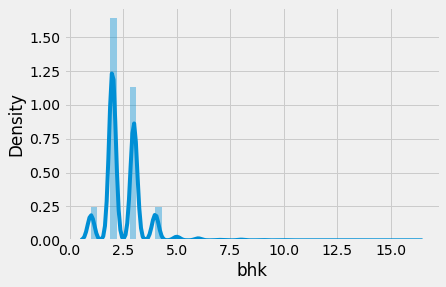

In [391]:
sns.distplot(df['bhk'])

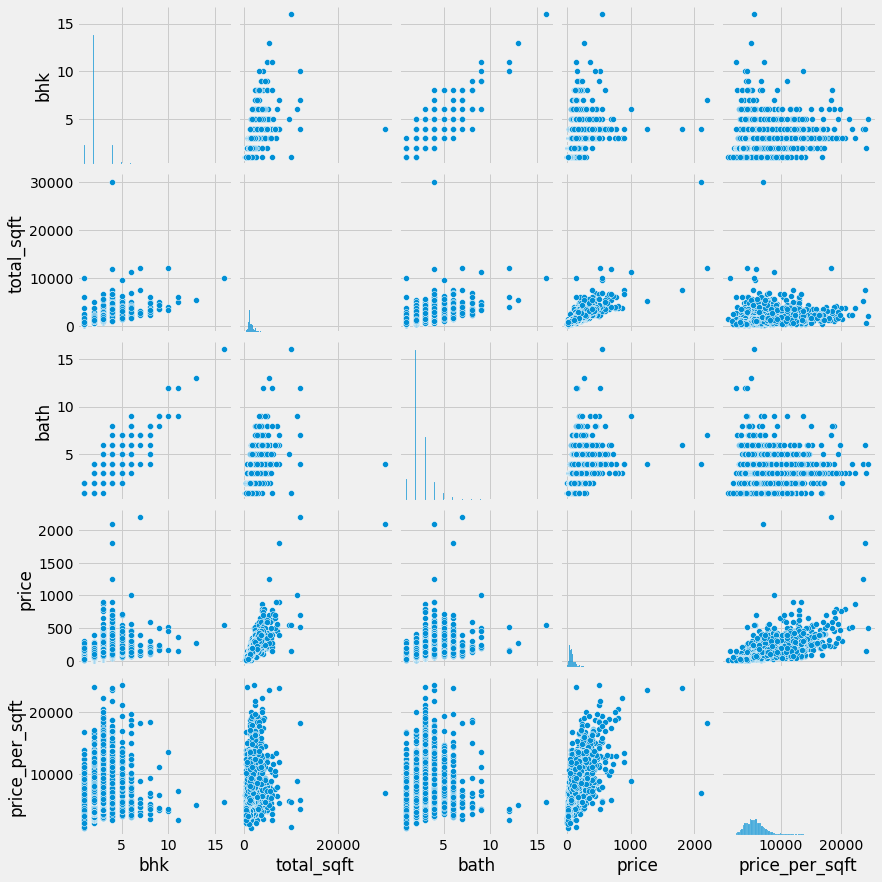

In [393]:
sns.pairplot(df)

<AxesSubplot:>

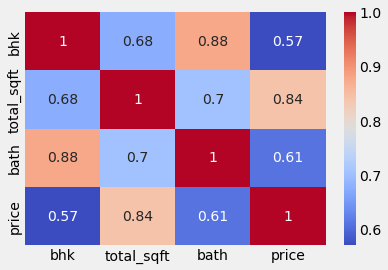

In [404]:
df.drop(['price_per_sqft'], axis=1, inplace=True)
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [406]:
df

,location,bhk,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,3,1875.0,2.0,235.0
3,1st Block Jayanagar,3,1200.0,2.0,130.0
4,1st Block Jayanagar,2,1235.0,2.0,148.0
...,...,...,...,...,...
10341,other,2,1200.0,2.0,70.0
10342,other,1,1800.0,1.0,200.0
10345,other,2,1353.0,2.0,110.0
10346,other,1,812.0,1.0,26.0


In [407]:
# save cleaned data
df.to_csv('Cleaned_data.csv')

In [411]:
# seperate x and y variable

x= df.drop(['price'], axis=1)
y = df.price
x

,location,bhk,total_sqft,bath
0,1st Block Jayanagar,4,2850.0,4.0
1,1st Block Jayanagar,3,1630.0,3.0
2,1st Block Jayanagar,3,1875.0,2.0
3,1st Block Jayanagar,3,1200.0,2.0
4,1st Block Jayanagar,2,1235.0,2.0
...,...,...,...,...
10341,other,2,1200.0,2.0
10342,other,1,1800.0,1.0
10345,other,2,1353.0,2.0
10346,other,1,812.0,1.0


In [412]:
# split the data in train and test

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=123)
xtrain

,location,bhk,total_sqft,bath
7130,Varthur Road,3,1247.0,2.0
4330,Kasavanhalli,2,1200.0,2.0
2943,Hebbal Kempapura,3,2900.0,4.0
7682,Whitefield,4,5400.0,5.0
7922,Yelahanka New Town,1,500.0,1.0
...,...,...,...,...
6473,Shivaji Nagar,2,600.0,1.0
4998,Malleshwaram,1,580.0,1.0
1617,Channasandra,3,1500.0,3.0
4290,Karuna Nagar,3,1960.0,3.0


Model building

In [425]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [426]:
column_transf = make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

scalar = StandardScaler()

lr = LinearRegression(normalize=True)


In [427]:
# create a pipeline
pipe_lr = make_pipeline(column_transf,scalar,lr)

In [428]:
# fit the data
pipe_lr.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [429]:
# make prediction

ypred_lr = pipe_lr.predict(xtest)

In [430]:
# check r2 score

r2_score(ytest,ypred_lr)

0.8178627979887793

In [431]:
# check with lasso
lasso = Lasso()
pipe_lasso = make_pipeline(column_transf,scalar,lasso)
pipe_lasso.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [432]:
ypred_lasso = pipe_lasso.predict(xtest)
r2_score(ytest,ypred_lasso)

0.8092947829832984

In [433]:
# Applying ridge

ridge = Ridge()
pipe_ridge = make_pipeline(column_transf,scalar,ridge)
pipe_ridge.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [434]:
ypred_ridge = pipe_ridge.predict(xtest)
r2_score(ytest,ypred_ridge)

0.8178542058418113

In [435]:
# dump the model
import pickle
pickle.dump(pipe_lr,open('LinearRegression.pkl','wb'))